# Anwendungen der LU-Zerlegung

In [1]:
import numpy as np

## Loesen eines Gleichungssystems

Die Lösung von 
$$A\,x = b$$
ergibt sich über die Lösung zweier Dreieckssysteme
\begin{align}\nonumber
A\,x = b\ \Leftrightarrow\ P\,A\,x = P\,b\ &\Leftrightarrow\ L\,\underbrace{R\,x}_{=y} = P\,b\\
\label{eq:lrlineqsolver} & \Leftrightarrow\ L\,y = P\,b\ \text{und}\ R\,x = y\end{align}
Zuerst bestimmt man durch Vorwärtseinsetzen $y$ und danach durch Rückwärtseinsetzen $x$.

Als System benutzen wir eine zufällige Matrix $A$ mit ganzzahligen Zahlen.

Bemerkung: Damit wir in der späteren Rechnung nicht über den integer Typ stolpern wandeln wir die Matrix in eine float Matrix um.

In [2]:
n = 50
A = np.array(np.random.randint(-9,9,size=(n,n)), dtype = float)

Behalten wir die Kondition etwas im Auge:

In [3]:
np.linalg.cond(A)

52.48054233036438

Da wir auch den Fehler bestimmen wollen, konstruieren wir uns eine Rechteseite $b$ für ein zufälliges $x$, welches wir wiederum berechnen werden:

In [4]:
xexakt = np.array(np.random.randint(-9,9,size=(n)), dtype = float)

Damit folgt für die rechte Seite $b$:

In [5]:
b = A@xexakt
b

array([-380., -104., -235.,  -43., -331.,   57.,  166.,  302., -187.,
        -57.,  423.,  425., -271.,  398.,  155.,  -36.,  -37.,   70.,
        128.,  215., -129.,  176.,  -14., -179.,   31.,   49.,  -19.,
        526.,  348.,  193.,   -8., -356., -100.,  -62.,  -23.,  375.,
       -102., -249.,  163.,  188.,  -35.,   45., -269.,  165., -240.,
         98.,  185., -129., -160.,  441.])

**1. Schritt:** LU Zerlegung berechnen

Wir benutzen aus Performance Gründe die Fortran Implementierung von scipy, der Erwertung von numpy:

In [6]:
from scipy.linalg import lu
#help(lu)

In [7]:
PT, L, R = lu(A) # Achtung: PT ist die Transponierte von P!!!
# P, L, R

In der Definition der Permutationsmatrix müssen wir vorsichtig sein: Hier gilt

$$P^T\cdot L\cdot R = A$$

Daher ist $P^T$ die Transponierte der Permutationsmatrix unserer Definition oben und im Skript!

In [8]:
np.linalg.norm(PT@L@R-A,np.inf)

1.0908018411269276e-13

**2. Schritt:** Vorwärtseinsetzen $L\,y = P\,b$

Wir benutzen hier wiederum eine native Implementierung aus scipy.

In [9]:
from scipy.linalg import solve_triangular
# help(solve_triangular)

In [10]:
y = solve_triangular(L, PT.T@b, lower = True) # Achtung: bei der unteren Dreiecksmatrix müssen wir aktiv lower = True setzen.

**3. Schritt:** Rückwärtseinsetzen $R\, x = y$ 

In [11]:
x = solve_triangular(R, y, lower = False) # Bem.: ich würde lower = ... immer aktiv setzen, umsicher zu stellen,
                                          #       dass das richtige durchgeführt wird.

In [12]:
np.round(x,8)

array([ 8., -8., -2.,  2.,  3., -1.,  5., -5., -7., -8.,  5.,  8., -3.,
       -7., -0.,  4., -7., -9., -1.,  5.,  7., -1., -4.,  1., -1., -9.,
       -6.,  8., -3.,  6.,  5., -5.,  7.,  8., -8.,  6., -0.,  5., -2.,
        7.,  3., -7., -0., -0.,  8.,  7.,  6., -3., -9.,  2.])

Kontrolle: In dem Fall können wir eine Kontrolle durchführen, da wir die Lösung kennen.

In [13]:
np.linalg.norm(x-xexakt,np.inf)

2.3092638912203256e-14

## Inverse

Betrachten wie die Berechnung der Inversen einer Matrix $A$ und benutzen dazu wieder eine Matrix mit zufälligen Koeffizienten.

In [14]:
A= np.array(np.random.randint(-5,5, size=(5,5)),dtype=float)
A

array([[ 4., -1., -3.,  0., -4.],
       [-1.,  1.,  4.,  4.,  1.],
       [-3., -5., -1., -5.,  1.],
       [-1.,  0.,  1.,  1., -1.],
       [-3.,  1., -1., -2.,  1.]])

In [15]:
id = np.eye(A.shape[0])
id

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

$P^T\cdot L\cdot R = A$

$L\cdot R\cdot x= e_k$

In [16]:
PT, L, R = lu(A)
invA = np.zeros_like(A)
for k in range(A.shape[0]):
    z = solve_triangular(L, PT.T[:,k],lower=True)   # hier können wir direkt die Spaltenvektoren der
                                                    # Permutationsmatrix aufrufen
    invA[:,k] = solve_triangular(R, z,lower=False)

Kontrolle:

In [17]:
np.round(invA@A,8)

array([[ 1.,  0.,  0.,  0., -0.],
       [ 0.,  1.,  0.,  0., -0.],
       [ 0., -0.,  1.,  0., -0.],
       [-0.,  0., -0.,  1.,  0.],
       [-0.,  0., -0., -0.,  1.]])

In [18]:
np.round(A@invA,8)

array([[ 1.,  0., -0.,  0.,  0.],
       [ 0.,  1.,  0., -0., -0.],
       [ 0.,  0.,  1., -0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0., -0.,  0.,  0.,  1.]])

## Berechnung der Determinante

Aus $P\,A = L\,R$ folgt
$$\det P\ \det A = \det L\ \det R = \det R.$$
Für $\det P$ gilt
$$\det P = \det P_{n,r_n} \ldots \det P_{1,r_1} = (-1)^{\text{\# Zeilenvertauschungen}}$$
und somit
$$\det A = (-1)^{\text{# Zeilenvertauschungen}}\cdot \prod_{j=1}^n r_{j,j}.$$
Gegenüber dem Laplaceschen Entwicklungssatz ($\sim n!$ Operationen) werden nun nur noch $\sim \frac{1}{3} n^3$ Operationen benötigt.

Benutzen wir die folgende Matrix:

In [19]:
A= np.array([[-2.,  2., -3., -5.,  4.],
       [-3.,  0., -4.,  0.,  2.],
       [ 2., -2.,  2.,  2., -4.],
       [-2.,  4., -4., -4.,  4.],
       [ 1., -4.,  3., -1., -1.]])

Berechnung der LR-Zerlegung mit Pivotisierung:

In [20]:
PT, L, R = lu(A)

Für die Determinante aus numpy erhalten wir:

In [21]:
np.linalg.det(A)

-16.000000000000007

Das Produkt
$$\prod_{j=1}^n r_{j,j}$$
liefert

In [22]:
np.prod(np.diag(R))

16.00000000000001

Wir sehen, dass das Resultat bis auf die Determinante der Permutationsmatrix stimmt.

Es stellt sich daher die Frage, wieviele Zeilenvertauschungen vorgenommen wurden?

In [23]:
PT

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

Um $P^T$ auf die Identität umzustellen benötigen wir 3 Zeilenvertauschungen.

Das können wir auch Berechnen in dem wir die Zeilen umstellen und die notwendige Anzahl Vertauschungen zählen.

In [24]:
Vertauschung = 0
for k in range(PT.shape[0]):
    if PT[k,k] == 0:
        print(PT[:,k])
        # suche die korrekte Zeile
        for j in range(k+1,PT.shape[0]):
            if PT[j,k] == 1:
                break
        print(j)
        # wir vertauschen die Zeilen
        PT[k,:], PT[j,:] = np.array(PT[j,:]), np.array(PT[k,:])
        # und addieren den Zähler Vertauschung hoch.
        Vertauschung += 1
        print(PT)
print('Anzahl Vertauschungen', Vertauschung)

[0. 1. 0. 0. 0.]
1
[[1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]
[0. 0. 0. 1. 0.]
3
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]]
[0. 0. 0. 0. 1.]
4
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
Anzahl Vertauschungen 3


Damit folgt für die Determinante von $A$:

In [25]:
(-1)**Vertauschung*np.prod(np.diag(R))

-16.00000000000001

mit korrektem Vorzeichen.

## Nachiteration

Aufgrund der Rechnerarithmetik ist es nicht möglich $L$ und $R$ exakt zu berechnen. Sei $x^0$ der Startwert und $\delta^0 = x-x^0$ der Fehler des Startwerts, wobei mit $x$ die exakte Lösung von $A\,x = b$ bezeichnet sei. Mit $\tilde{L}, \tilde{R}$ sei die Näherung von $L, R$ bezeichnet. Es gilt daher
\begin{equation}A\,\delta^0 = b - A\,x^0 = r^0.\end{equation}
Könnte man die obige Gleichung exakt lösen, bekäme man mit $x^0 + \delta^0$ die exakte Lösung. Dies ist nicht möglich. Daher wird mit der berechneten Näherung $\tilde{L}, \tilde{R}$ die Gleichung gelöst:
$$\tilde{L} y^0 = r^0,\quad \tilde{R} \delta^0 = y^0.$$
Mit $x^1 = x^0+\delta^0$ erhält man eine weitere Näherung, die hoffentlich exakter ist.

Gilt für die näherungsweise LU-Zerlegung $\tilde{L}\tilde{R} = A + \Delta A$, so konvergiert das Verfahren der Nachiteration (bei exakter Rechnung) gegen die Lösung von $A\,x=b$, wenn für irgendeine Norm auf $\mathbb{R}^n$ die Bedingung
$$\|A^{-1}\| \|\Delta A\| < \frac{1}{2}$$
erfüllt ist. Diese Bedingung ist hinreichend, jedoch nicht notwendig. In der Praxis wendet man die Nachiteration - meist mit sehr gutem Erfolg - **ohne** Überprüfung der Bedingung an.

Wir betrachten das Verfahren für die Matrix $A$ und rechte Seite $b$:

In [26]:
A = np.array([[8, -7, 1, 6, 3], [2, -3, -3, 5, -9], [8, -3, -3, 7, 0], [7, -1, -1, 6, 4], [0, -1, -9, 3, 4]])
A

array([[ 8, -7,  1,  6,  3],
       [ 2, -3, -3,  5, -9],
       [ 8, -3, -3,  7,  0],
       [ 7, -1, -1,  6,  4],
       [ 0, -1, -9,  3,  4]])

In [27]:
b = np.array([11, -8, 9, 15, -3])
b

array([11, -8,  9, 15, -3])

Für die LU-Zerlegung erhalten wir

In [28]:
PT, L, R = lu(A)

Nun runden wir die Zerlegung auf 3 Nachkommazeichen, als Näherung

In [29]:
PT@L@R

array([[ 8., -7.,  1.,  6.,  3.],
       [ 2., -3., -3.,  5., -9.],
       [ 8., -3., -3.,  7.,  0.],
       [ 7., -1., -1.,  6.,  4.],
       [ 0., -1., -9.,  3.,  4.]])

In [30]:
PT

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [31]:
Lapprox = np.round(L,3)
Rapprox = np.round(R,3)

Für das Konvergenzkriterium
$$\|A^{-1}\| \|\Delta A\| < \frac{1}{2}$$
folgt:

In [32]:
deltaA = A-PT@Lapprox@Rapprox
deltaA

array([[ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.0005  ,  0.001436, -0.000816, -0.000628],
       [ 0.      ,  0.0025  ,  0.000686, -0.001164,  0.005256],
       [ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ],
       [ 0.      , -0.000625,  0.000375,  0.00025 ,  0.000125]])

Wie man die Inverse berechnet haben wir kennen gelernt. Wir benutzten hier der Übersicht halber die Inverse Methode von numpy. In der Praxis berechnet man möglichst nie die Inverse, weshalb das Kriterium so gut wie nie überprüft wird. Es ist mehr von theoretischem Nutzen.

In [33]:
np.linalg.norm(np.linalg.inv(A),np.inf)*np.linalg.norm(deltaA,np.inf)

0.015460544378698579

Das Kriterium ist in dem Fall gut erfüllt.

Wir berechnen nun das erste Residuum mit der gerundeten LU-Zerlegung:

In [34]:
z = solve_triangular(Lapprox, PT.T@b, lower=True)
x = solve_triangular(Rapprox, z, lower=False)
res = b-A@x
res

array([ 0.        , -0.00049354, -0.00727699,  0.        , -0.0001229 ])

Nun wenden wir den Algorithmus 2.4 für das Nachiterieren an:

In [35]:
residuums = [np.linalg.norm(res,np.inf)]
for k in range(5):
    z = solve_triangular(Lapprox, PT.T@res, lower=True)
    delta = solve_triangular(Rapprox, z, lower=False)
    x += delta;
    res = b - A@x;
    print(x)
    residuums.append(np.linalg.norm(res,np.inf))

[1.00000075 0.99999994 0.99999945 0.99999902 1.        ]
[1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1.]


Das Residuum nimmt sehr schnell ab:

In [36]:
import matplotlib.pyplot as plt

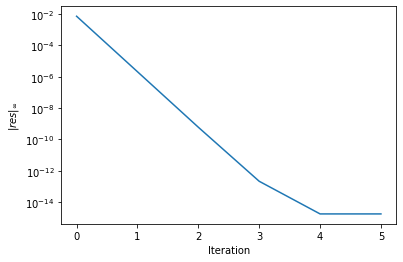

In [37]:
plt.semilogy(residuums)
plt.xlabel('Iteration')
plt.ylabel('$\|res\|_\infty$')
plt.show()

**Bemerkung:** Nachiterieren ist etwas was immer wieder angewandt wird, um die Genauigkeit einer Lösung zu Verbessern.